# **IMPORTS**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from scipy.stats import chi2_contingency
#Neural Network model
from sklearn.metrics import mean_squared_error

#data transformation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# SVM Model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# ANN Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# **Investigate data (Missing values, Descriptions, Data Types)**

In [4]:
data=pd.read_csv("dataset.csv")
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Model Year,946.0,2022.000000,0.000000,2022.0,2022.00,2022.0,2022.00,2022.0
Engine Size(L),946.0,3.198732,1.374814,1.2,2.00,3.0,3.80,8.0
Cylinders,946.0,5.668076,1.932670,3.0,4.00,6.0,6.00,16.0
Fuel Consumption (City (L/100 km),946.0,12.506448,3.452043,4.0,10.20,12.2,14.70,30.3
Fuel Consumption(Hwy (L/100 km)),946.0,9.363319,2.285125,3.9,7.70,9.2,10.70,20.9
Fuel Consumption(Comb (L/100 km)),946.0,11.092072,2.876276,4.0,9.10,10.8,12.90,26.1
Fuel Consumption(Comb (mpg)),946.0,27.247357,7.685217,11.0,22.00,26.0,31.00,71.0
CO2 Emissions(g/km),946.0,259.172304,64.443149,94.0,213.25,257.0,300.75,608.0
CO2 Rating,946.0,4.539112,1.471799,1.0,3.00,5.0,5.00,10.0
Smog Rating,946.0,4.950317,1.679842,1.0,3.00,5.0,6.00,7.0


# **DATA CLEANING**

In [7]:
df= data.drop(['Model Year','Fuel Consumption (City (L/100 km)','Transmission','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))'],axis=1)
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,ILX,Compact,2.4,4,Z,8.6,200,6,3
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,Z,11.2,263,4,5
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,Z,9.9,232,5,6
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,Z,10.3,242,5,6
4,Acura,TLX SH-AWD,Compact,2.0,4,Z,9.8,230,5,7
...,...,...,...,...,...,...,...,...,...,...
941,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,Z,9.4,219,5,5
942,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,Z,9.4,219,5,5
943,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,Z,9.9,232,5,7
944,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,Z,10.1,236,5,5


In [8]:
df.isna().sum()

Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Fuel Type                            0
Fuel Consumption(Comb (L/100 km))    0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [9]:
df = df.replace({'Fuel Type' : {'Z':'95', 'X': '91'}})
df = df[~df['Fuel Type'].isin(['E','D'])]
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,Acura,ILX,Compact,2.4,4,95,8.6,200,6,3
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,95,11.2,263,4,5
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,95,9.9,232,5,6
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,95,10.3,242,5,6
4,Acura,TLX SH-AWD,Compact,2.0,4,95,9.8,230,5,7
...,...,...,...,...,...,...,...,...,...,...
941,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,95,9.4,219,5,5
942,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,95,9.4,219,5,5
943,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,95,9.9,232,5,7
944,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,95,10.1,236,5,5


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),904.0,3.186504,1.388912,1.2,2.00,3.0,3.8,8.0
Cylinders,904.0,5.646018,1.955407,3.0,4.00,6.0,6.0,16.0
Fuel Consumption(Comb (L/100 km)),904.0,11.020022,2.797299,4.0,9.10,10.9,12.9,26.1
CO2 Emissions(g/km),904.0,258.235619,65.418415,94.0,211.75,254.0,302.0,608.0
CO2 Rating,904.0,4.565265,1.492005,1.0,3.00,5.0,5.0,10.0
Smog Rating,904.0,5.036504,1.645759,1.0,5.00,5.0,6.0,7.0


# **Data** **Analysis**

In [11]:
Correlation= data[['Engine Size(L)','CO2 Emissions(g/km)', 'Fuel Consumption(Comb (L/100 km))', 'Smog Rating','Cylinders']].corr()
Correlation

,Engine Size(L),CO2 Emissions(g/km),Fuel Consumption(Comb (L/100 km)),Smog Rating,Cylinders
Engine Size(L),1.000000,0.824188,0.818694,-0.448239,0.920698
CO2 Emissions(g/km),0.824188,1.000000,0.971671,-0.520437,0.833241
Fuel Consumption(Comb (L/100 km)),0.818694,0.971671,1.000000,-0.490473,0.821718
Smog Rating,-0.448239,-0.520437,-0.490473,1.000000,-0.502149
Cylinders,0.920698,0.833241,0.821718,-0.502149,1.000000


# **Data Analysis**

Frequency Destribution for categorical Columns


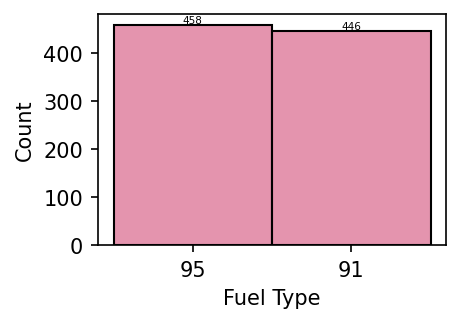

In [12]:
plt.figure(figsize=(3,2), dpi=150)
chart1=sns.histplot(data=df, x='Fuel Type', color='PaleVioletRed')
chart1.bar_label(chart1.containers[0],size=5)
plt.show()

Frequency Destribution for Numerical Columns

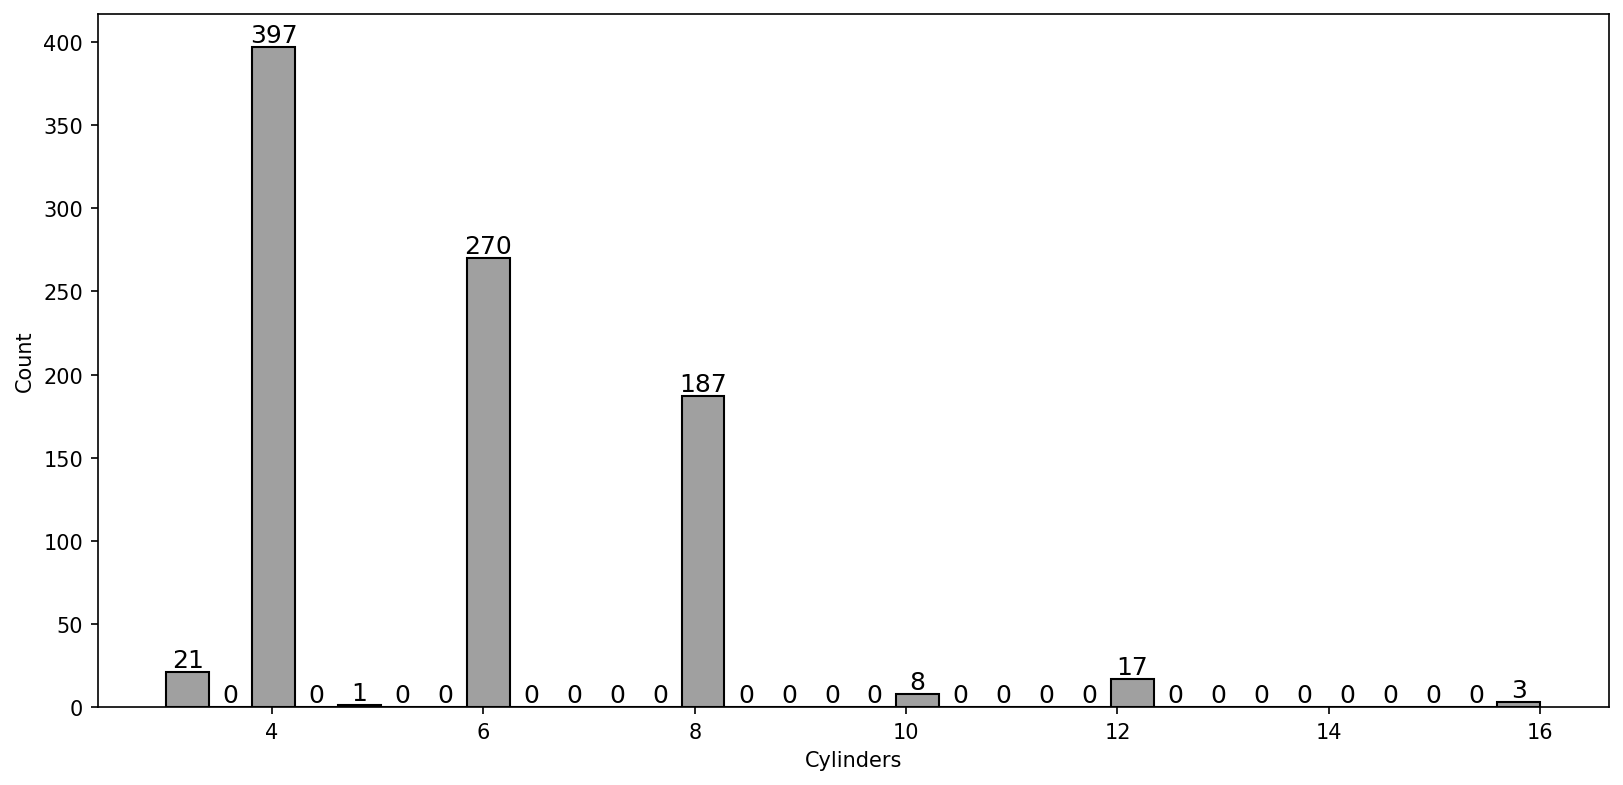

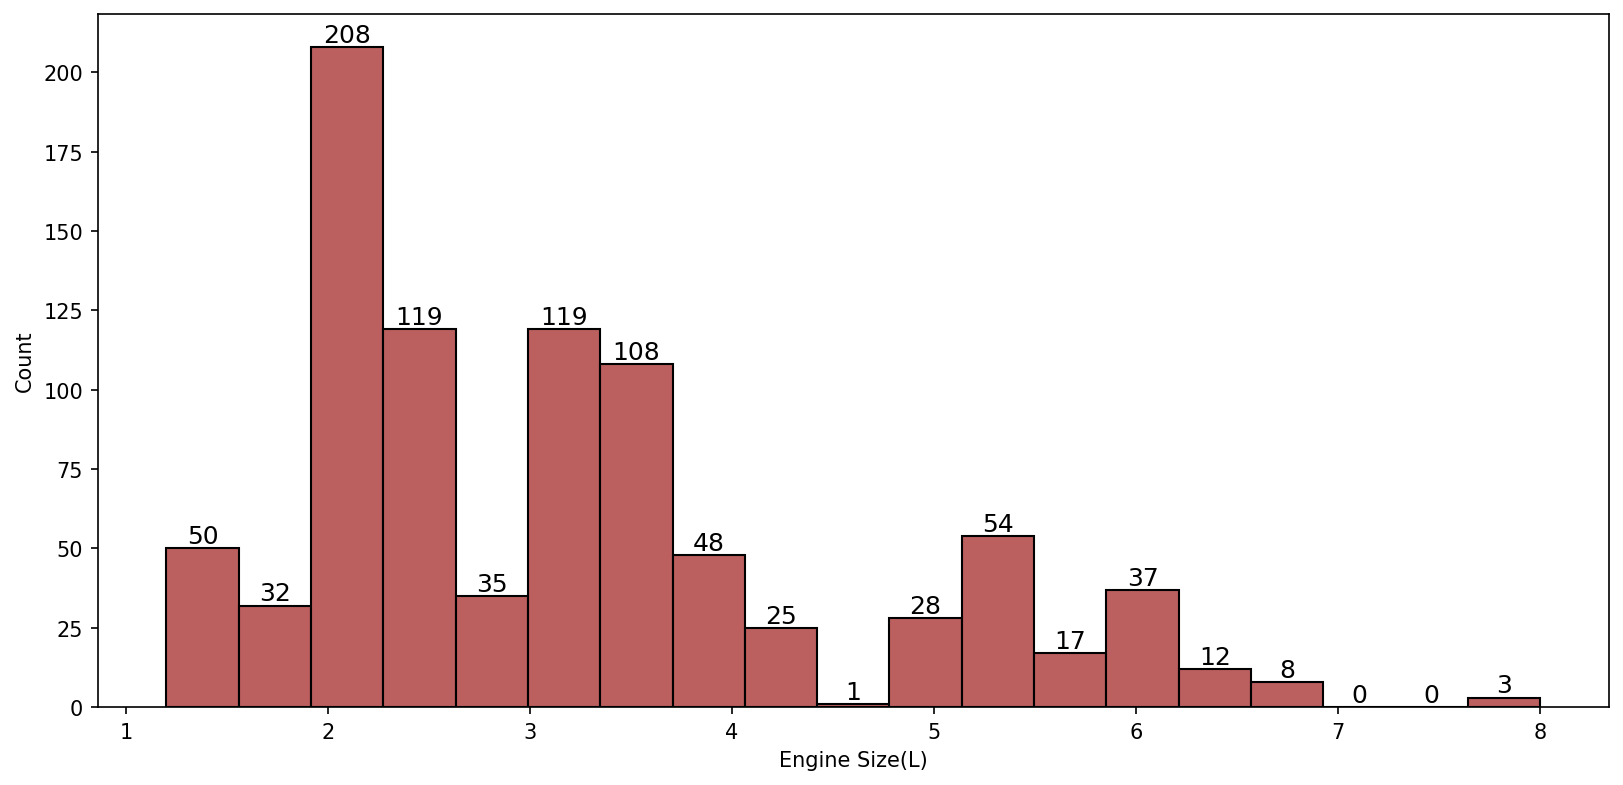

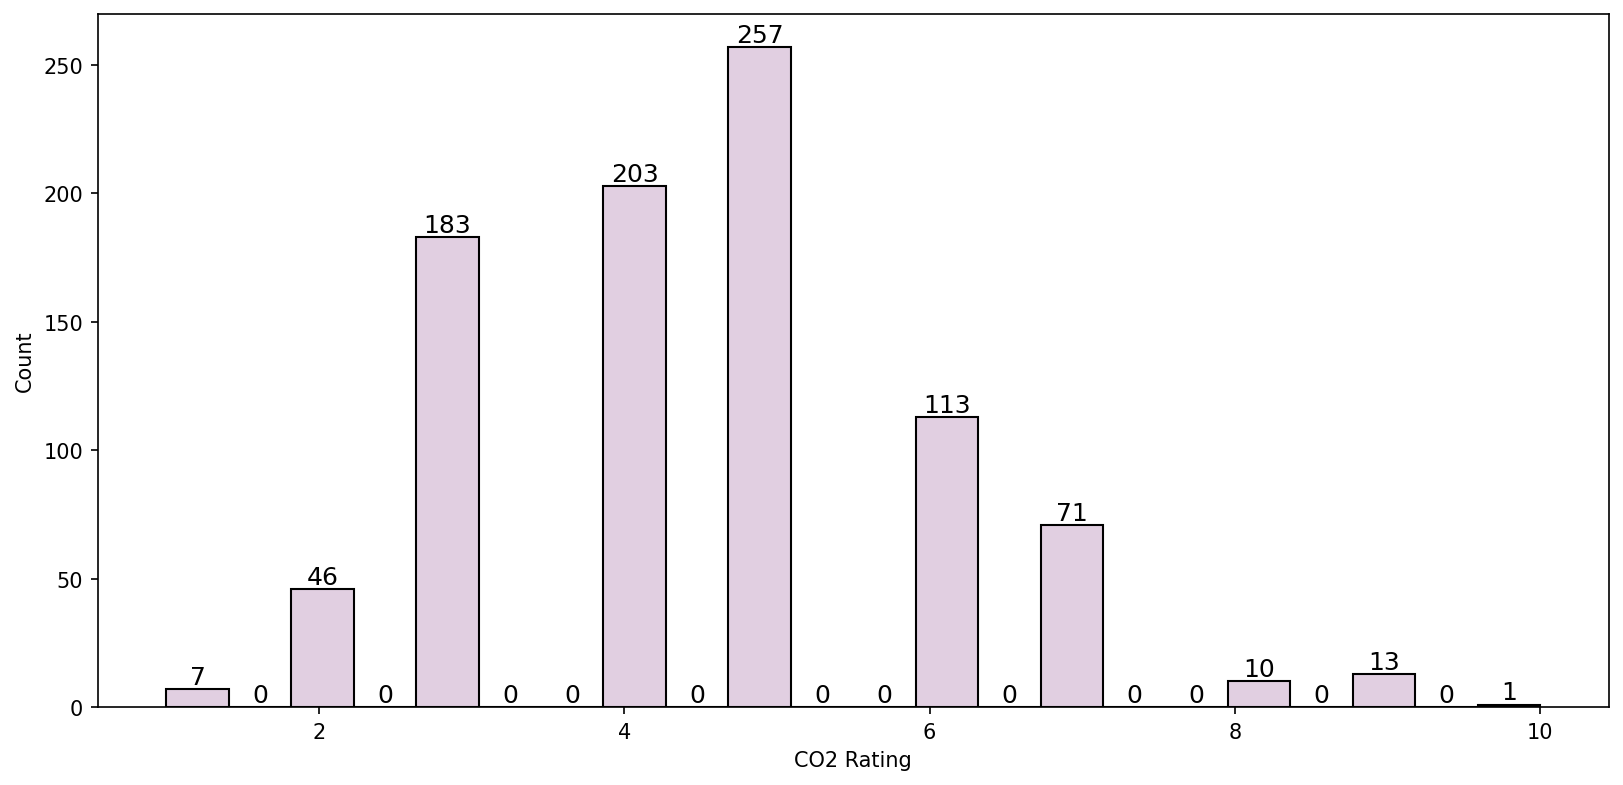

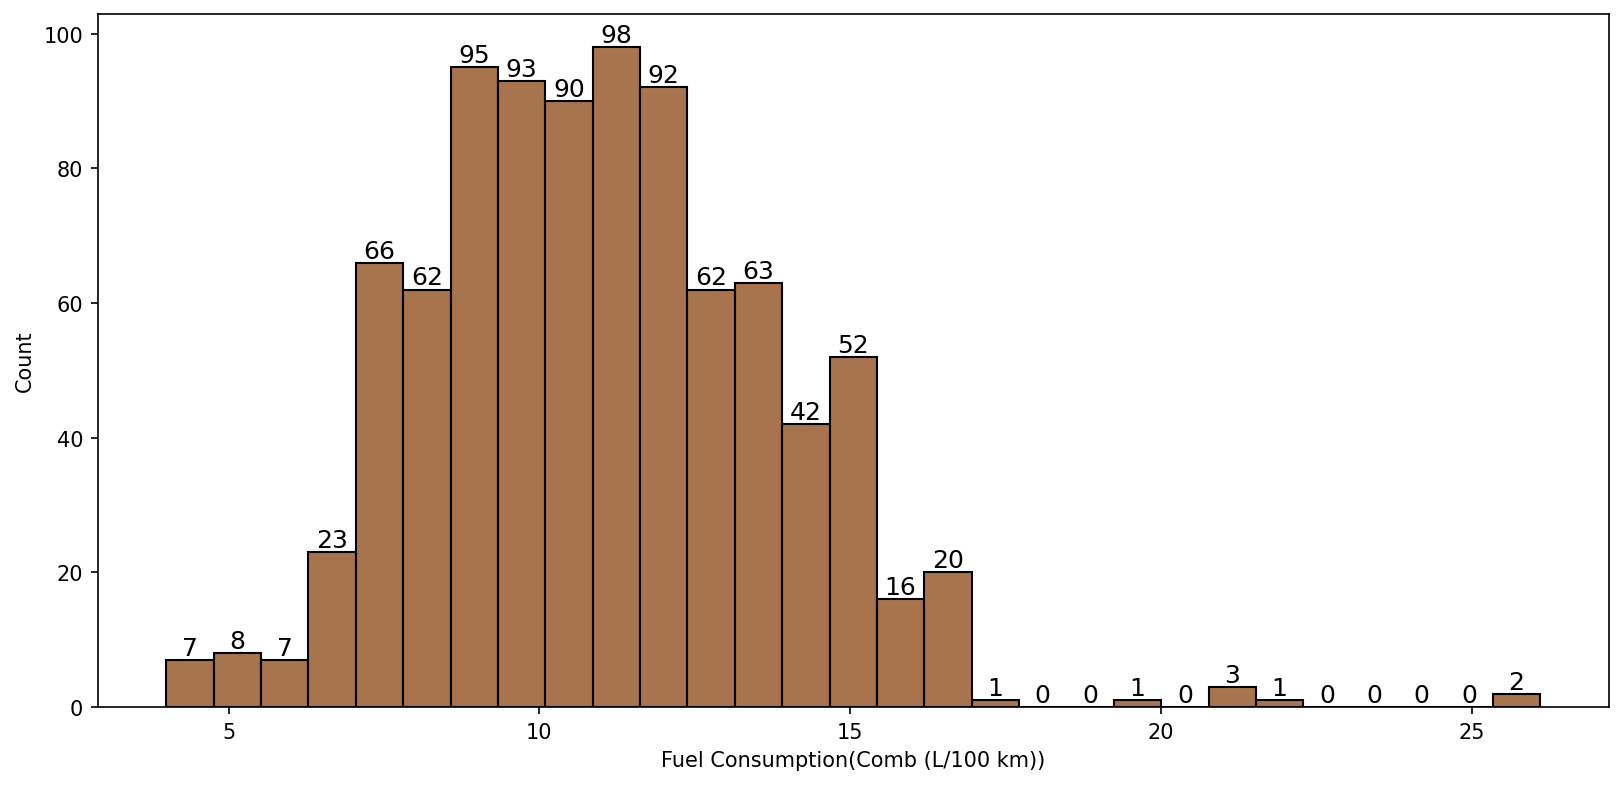

In [13]:
column_set = ['Cylinders','Engine Size(L)','CO2 Rating','Fuel Consumption(Comb (L/100 km))']
color_set = ['grey','brown','Thistle', 'SaddleBrown']
for colors,col in zip(color_set,column_set):
    plt.figure(figsize=(13,6), dpi=150)
    chart1=sns.histplot(data=df, x=col, color=colors)
    chart1.bar_label(chart1.containers[0],size=12)
    plt.show()

# **Bivariate Analysis**

<Figure size 1950x900 with 0 Axes>

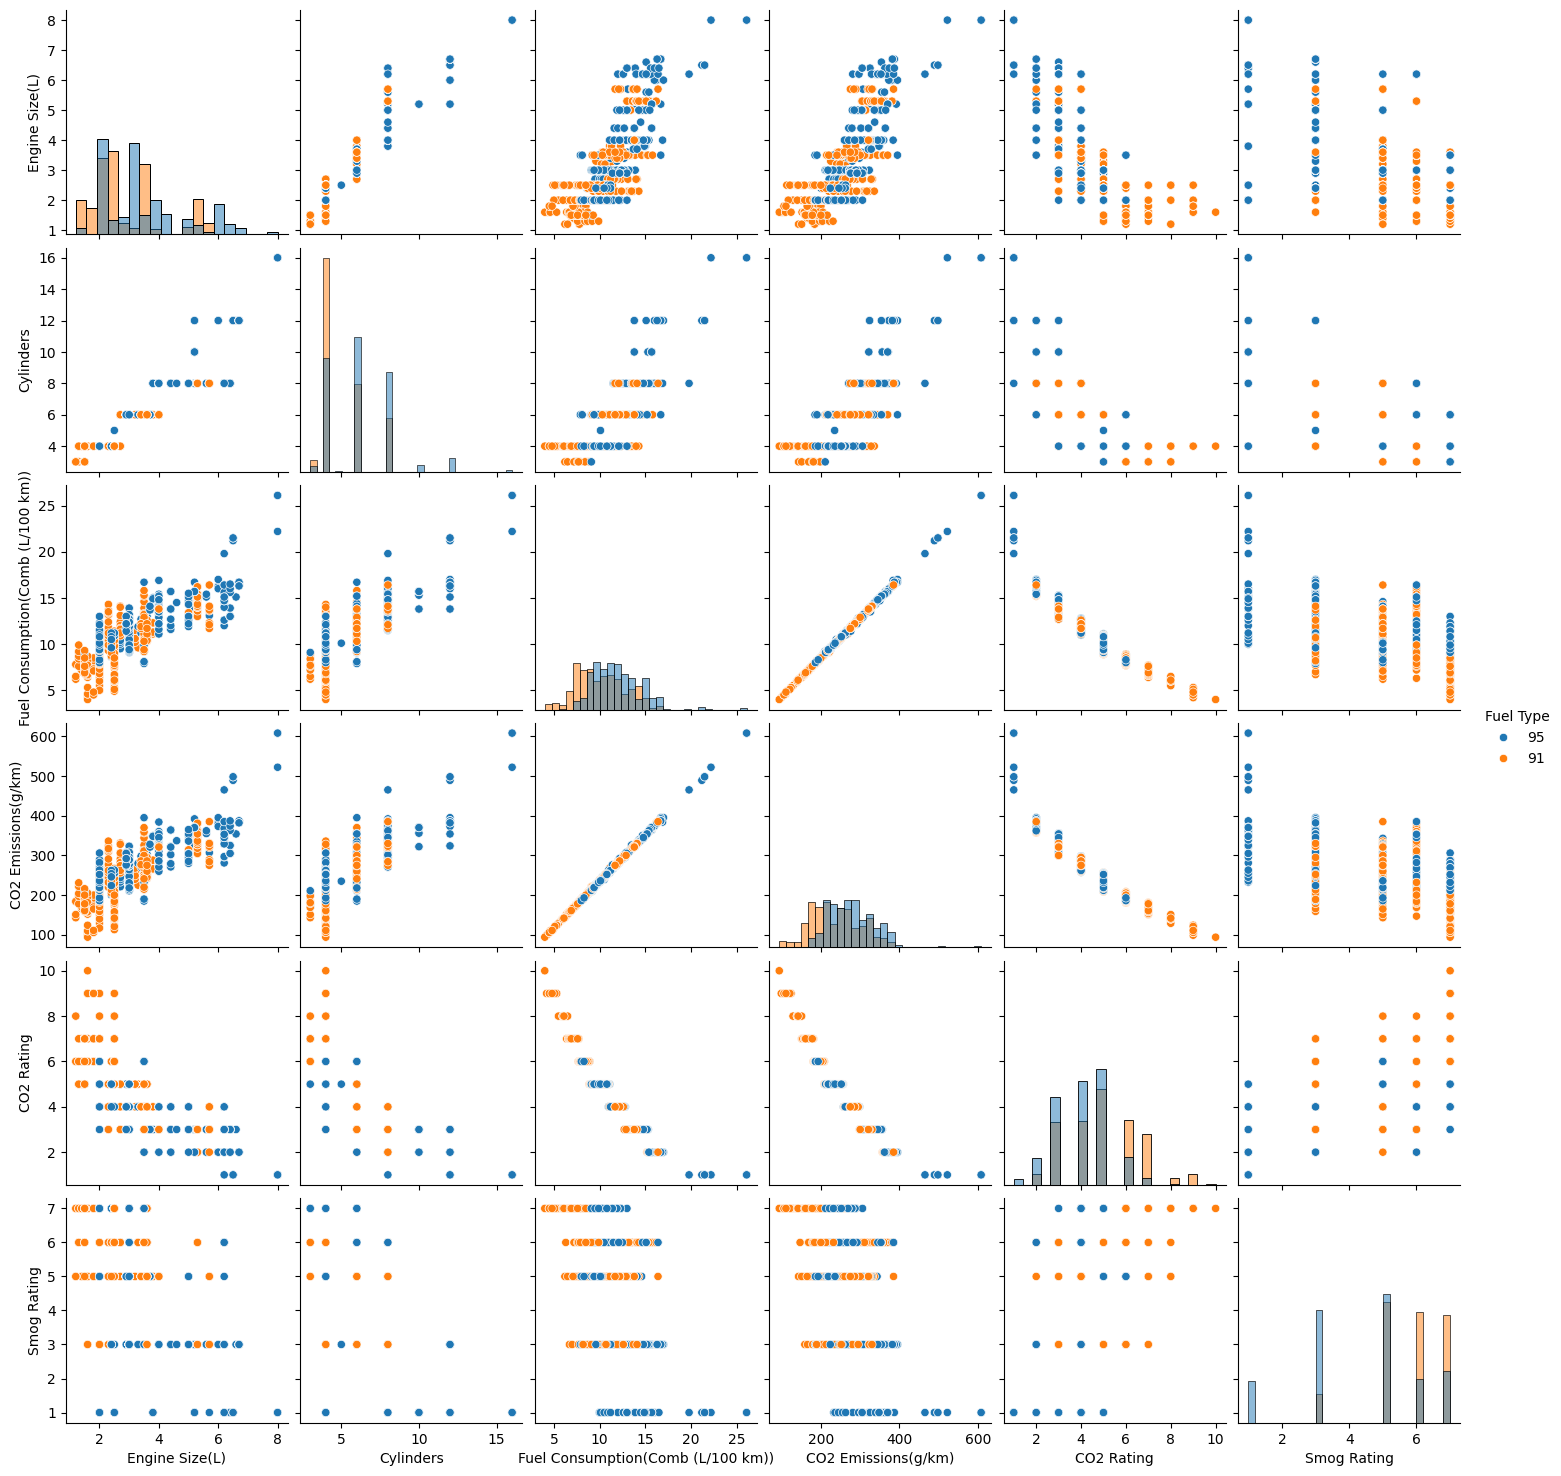

In [14]:
plt.figure(figsize=(13,6), dpi=150)
sns.pairplot(df, hue='Fuel Type',diag_kind='hist')

Comparison between "No. of cylinders" & "Fuel Consumption"

<ipython-input-15-e2de96f9cb0c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption(Comb (L/100 km))",palette='mako_r', ci=None)
<ipython-input-15-e2de96f9cb0c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption(Comb (L/100 km))",palette='mako_r', ci=None)


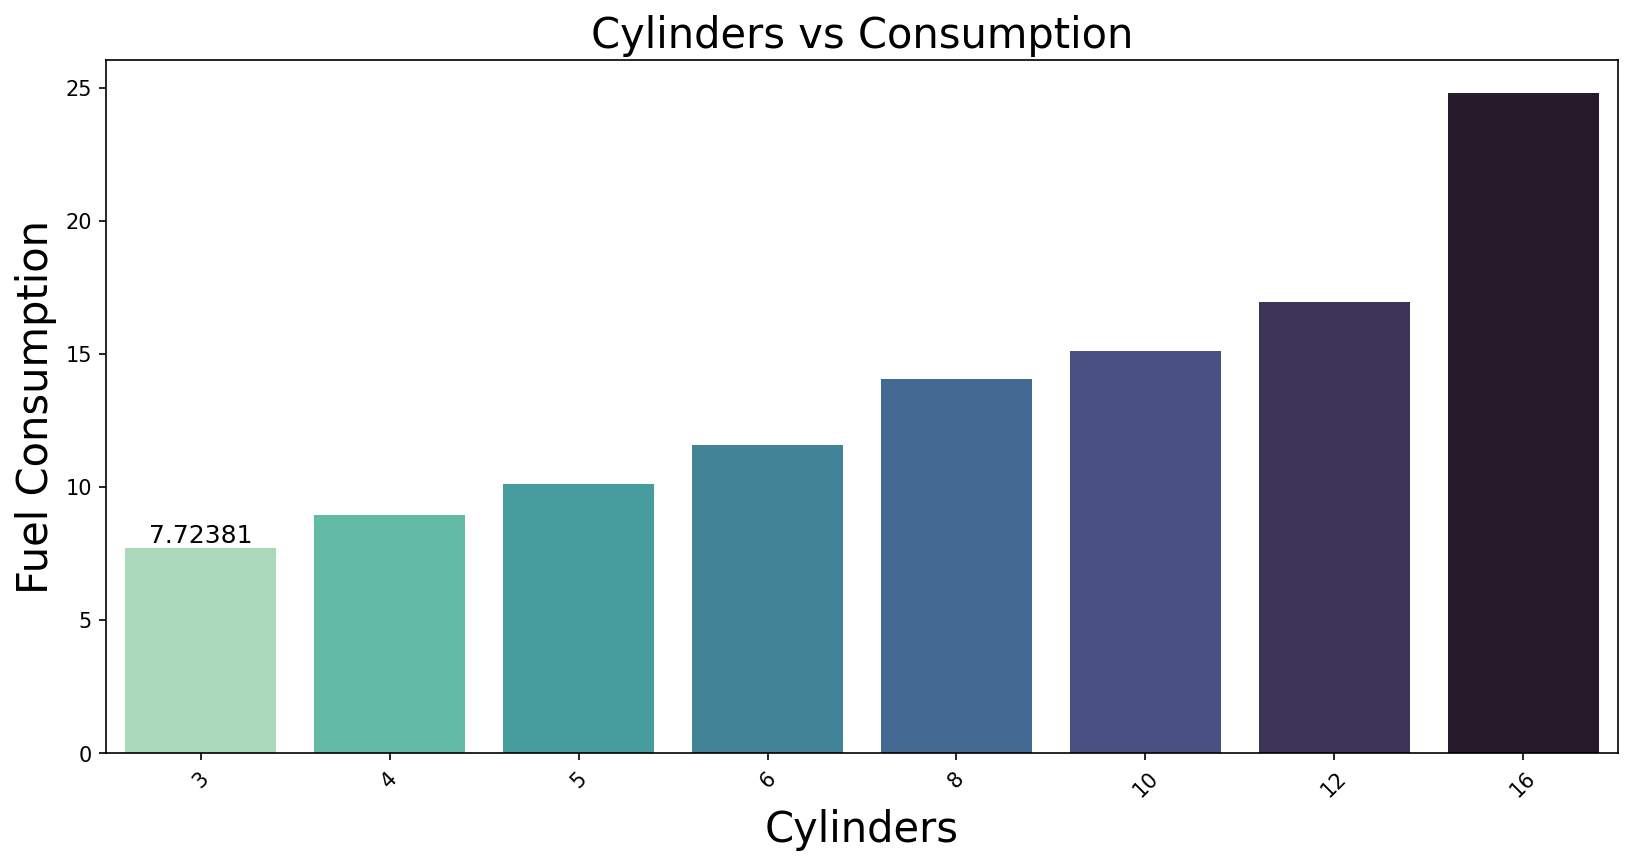

In [15]:
plt.figure(figsize=(13,6), dpi=150)
plt.xticks(rotation=45)
plt.title('Cylinders vs Consumption',size=20)
chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption(Comb (L/100 km))",palette='mako_r', ci=None)
plt.xlabel('Cylinders',size=20)
plt.ylabel('Fuel Consumption',size=20)
chart1.bar_label(chart1.containers[0],size=12)
plt.show()

Heatmap showing "Pearson correlation"

<Axes: >

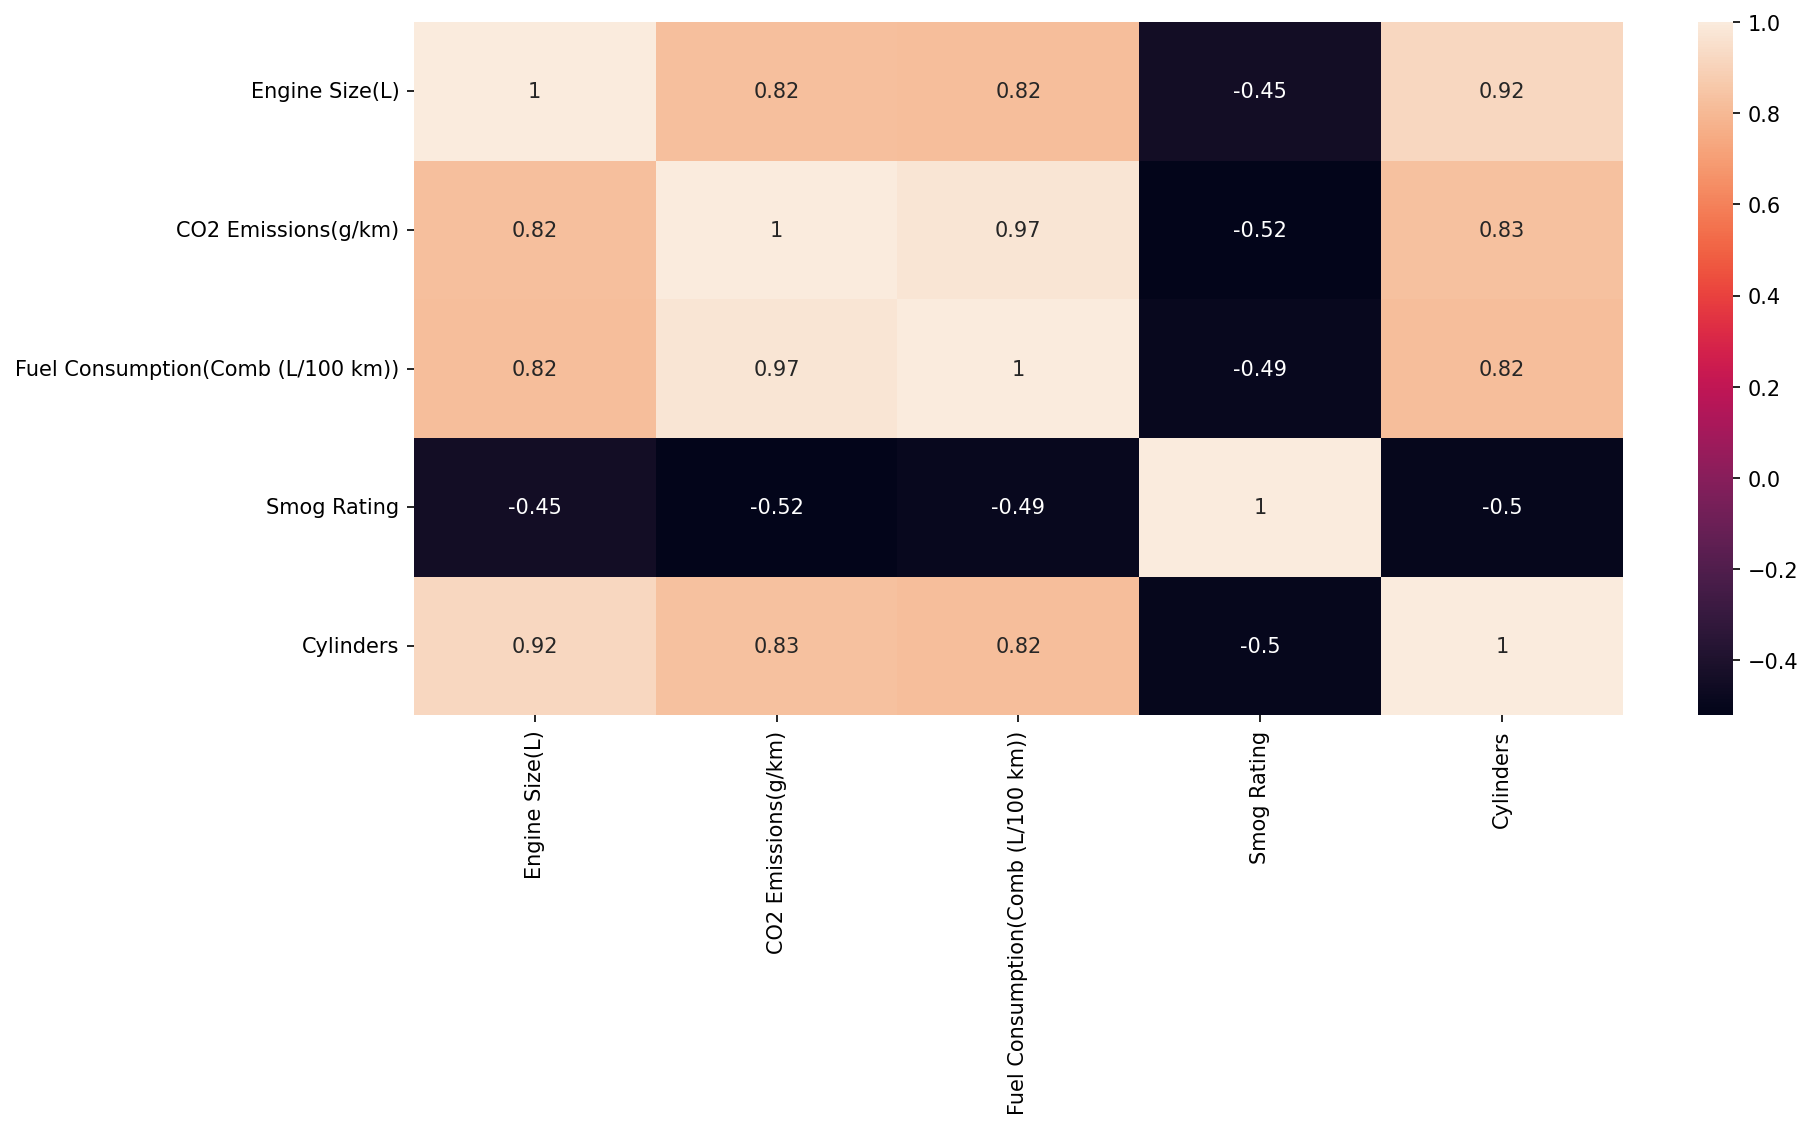

In [16]:
plt.figure(figsize=(13,6), dpi=150)
sns.heatmap(Correlation,annot=True)

# **Data Preprocessing**

Outlier analysis

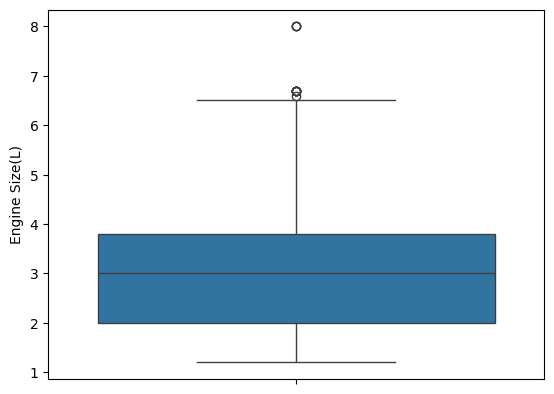

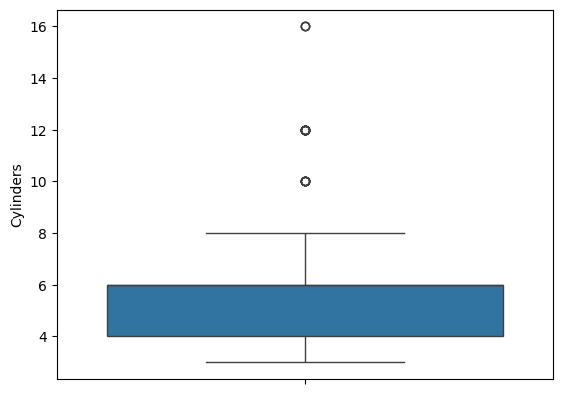

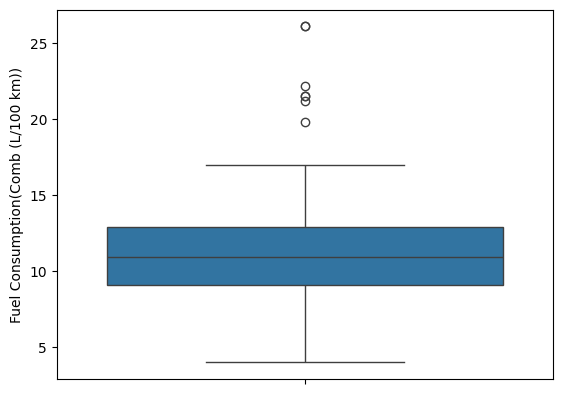

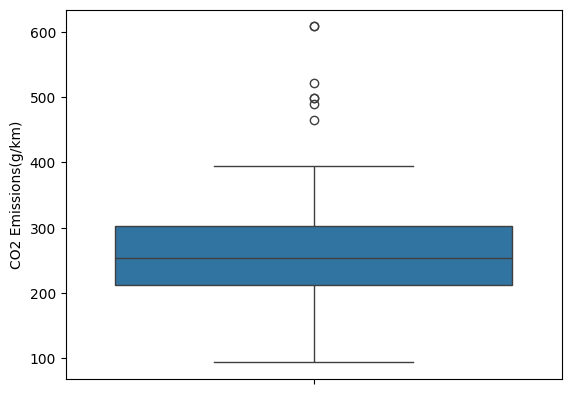

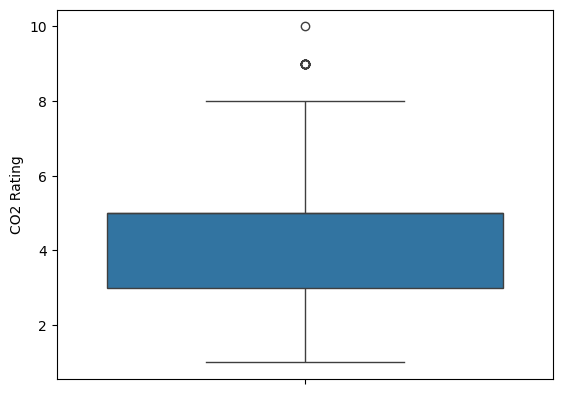

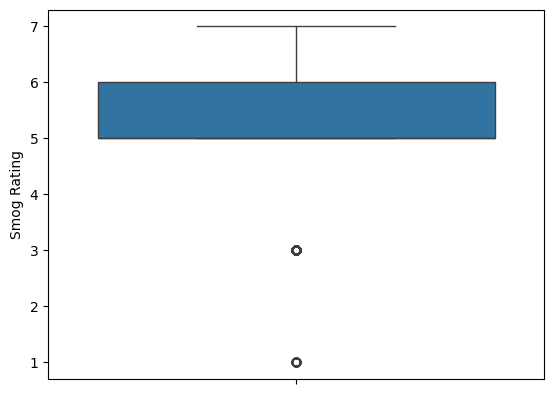

In [17]:
for col in df.columns:
    if df[col].dtypes!= object:
        sns.boxplot(y=col,data=df)
        plt.show()

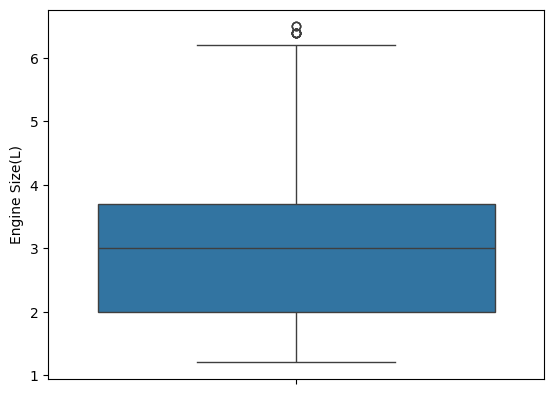

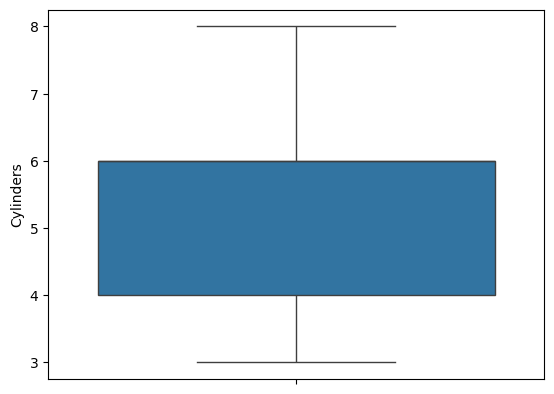

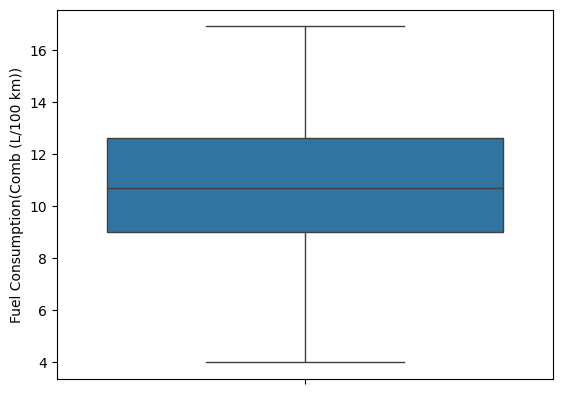

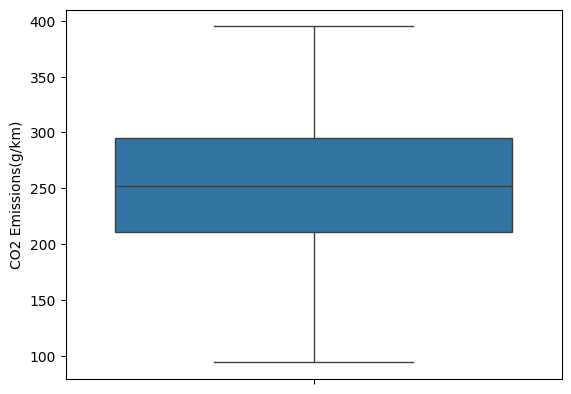

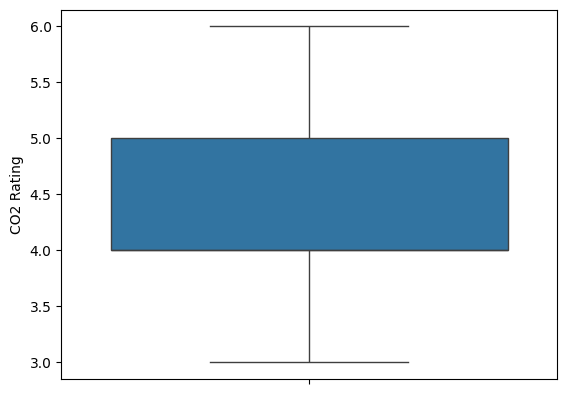

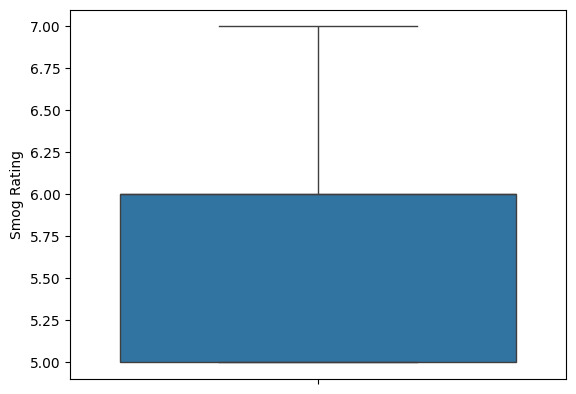

In [18]:
for col in df.columns:
    if df[col].dtypes!= object:
        percentile_25=df[col].quantile(0.25)
        percentile_75=df[col].quantile(0.75)
        IQR=percentile_75-percentile_25
        upper_limit=percentile_75+(1.5*IQR)
        lower_limit=percentile_25-(1.5*IQR)
        df=df[df[col]<=upper_limit]
        df=df[df[col]>=lower_limit]
        plt.figure()
        sns.boxplot(y=col,data=df)

In [19]:
df.shape

(577, 10)

# **Ordinal Encoding**

Change caterorical features into numerical using ordinal encoder.


In [20]:
order = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan',\
         'Station wagon: Small','Station wagon: Mid-size', 'Pickup truck: Small', 'Special purpose vehicle',\
         'Pickup truck: Standard']

od = OrdinalEncoder(categories = [order])

df["Vehicle Class_X"] = od.fit_transform(df[["Vehicle Class"]])

In [21]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Vehicle Class_X
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,95,11.2,263,4,5,6.0
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,95,9.9,232,5,6,6.0
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,95,10.3,242,5,6,6.0
4,Acura,TLX SH-AWD,Compact,2.0,4,95,9.8,230,5,7,2.0
5,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,95,9.8,231,5,7,2.0


In [22]:
print(data['Make'].value_counts())

Make
Ford             89
Chevrolet        80
Porsche          77
BMW              60
GMC              54
Toyota           51
Audi             45
Mercedes-Benz    43
Jeep             34
Hyundai          29
Lexus            28
Cadillac         26
Kia              25
Nissan           23
Honda            23
Mazda            23
Dodge            21
MINI             20
Subaru           19
Volkswagen       18
Land Rover       18
Ram              16
Maserati         13
Volvo            12
Buick             9
Acura             8
Lamborghini       8
Infiniti          8
Genesis           8
Bentley           8
Jaguar            8
Lincoln           7
Mitsubishi        7
Rolls-Royce       7
Alfa Romeo        6
Chrysler          6
Aston Martin      5
Bugatti           3
FIAT              1
Name: count, dtype: int64


In [23]:
od = OrdinalEncoder(categories = [data['Make'].value_counts().index.to_list()])
df["Make_X"] = od.fit_transform(df[["Make"]])
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Vehicle Class_X,Make_X
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,95,11.2,263,4,5,6.0,25.0
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,95,9.9,232,5,6,6.0,25.0
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,95,10.3,242,5,6,6.0,25.0
4,Acura,TLX SH-AWD,Compact,2.0,4,95,9.8,230,5,7,2.0,25.0
5,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,95,9.8,231,5,7,2.0,25.0


In [24]:
od = OrdinalEncoder(categories = [data['Model'].value_counts().index.to_list()])
df["Model_Y"] = od.fit_transform(df[["Model"]])
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Vehicle Class_X,Make_X,Model_Y
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,95,11.2,263,4,5,6.0,25.0,576.0
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,95,9.9,232,5,6,6.0,25.0,511.0
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,95,10.3,242,5,6,6.0,25.0,512.0
4,Acura,TLX SH-AWD,Compact,2.0,4,95,9.8,230,5,7,2.0,25.0,513.0
5,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,95,9.8,231,5,7,2.0,25.0,514.0


In [25]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Vehicle Class_X,Make_X,Model_Y
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,95,11.2,263,4,5,6.0,25.0,576.0
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,95,9.9,232,5,6,6.0,25.0,511.0
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,95,10.3,242,5,6,6.0,25.0,512.0
4,Acura,TLX SH-AWD,Compact,2.0,4,95,9.8,230,5,7,2.0,25.0,513.0
5,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,95,9.8,231,5,7,2.0,25.0,514.0


# **One hot encoding on categorizal column (Fuel Type)**

In [26]:
# Drop Deisel from the column "Fuel type" because its an oulier.
df = df[df["Fuel Type"] != "D"]
new_df = df['Fuel Type'].str.get_dummies()

In [27]:
new_df

,91,95
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
...,...,...
941,0,1
942,0,1
943,0,1
944,0,1


In [28]:
df= pd.concat([df,new_df], axis =1)

In [29]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Vehicle Class_X,Make_X,Model_Y,91,95
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,95,11.2,263,4,5,6.0,25.0,576.0,0,1
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,95,9.9,232,5,6,6.0,25.0,511.0,0,1
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,95,10.3,242,5,6,6.0,25.0,512.0,0,1
4,Acura,TLX SH-AWD,Compact,2.0,4,95,9.8,230,5,7,2.0,25.0,513.0,0,1
5,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,95,9.8,231,5,7,2.0,25.0,514.0,0,1


# **Split into Train and Test**

In [30]:
x = df.drop(["Fuel Type","Vehicle Class","Model","Make"], axis = 1)

In [31]:
x.head()

,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Vehicle Class_X,Make_X,Model_Y,91,95
1,3.5,6,11.2,263,4,5,6.0,25.0,576.0,0,1
2,2.0,4,9.9,232,5,6,6.0,25.0,511.0,0,1
3,2.0,4,10.3,242,5,6,6.0,25.0,512.0,0,1
4,2.0,4,9.8,230,5,7,2.0,25.0,513.0,0,1
5,2.0,4,9.8,231,5,7,2.0,25.0,514.0,0,1


In [32]:
y= df['Fuel Consumption(Comb (L/100 km))']

In [33]:
y.head().to_frame()

,Fuel Consumption(Comb (L/100 km))
1,11.2
2,9.9
3,10.3
4,9.8
5,9.8


In [34]:
#from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.25 , random_state= 51)

In [35]:
xtrain

,Engine Size(L),Cylinders,Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Vehicle Class_X,Make_X,Model_Y,91,95
485,2.0,4,9.7,228,5,6,6.0,27.0,600.0,0,1
670,3.0,6,12.1,283,4,6,7.0,7.0,249.0,0,1
678,3.0,6,9.3,218,5,6,4.0,7.0,220.0,0,1
130,2.0,4,8.5,199,6,7,0.0,3.0,486.0,0,1
897,2.5,4,7.9,184,6,7,6.0,5.0,306.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
599,2.4,4,9.5,222,5,7,6.0,10.0,181.0,0,1
707,2.0,4,8.9,207,6,7,4.0,17.0,374.0,0,1
859,2.5,4,7.8,184,6,7,5.0,18.0,144.0,1,0
781,3.0,6,11.9,278,4,5,1.0,2.0,55.0,0,1


In [36]:
Correlation= x[['Engine Size(L)','CO2 Emissions(g/km)', 'Fuel Consumption(Comb (L/100 km))', 'Smog Rating','Cylinders' ,"Vehicle Class_X" ,"Make_X" , "Model_Y" , "91" , "95" ]].corr()
Correlation

,Engine Size(L),CO2 Emissions(g/km),Fuel Consumption(Comb (L/100 km)),Smog Rating,Cylinders,Vehicle Class_X,Make_X,Model_Y,91,95
Engine Size(L),1.000000,0.777272,0.777923,-0.190490,0.927933,0.286290,-0.198988,-0.130124,-0.013451,0.013451
CO2 Emissions(g/km),0.777272,1.000000,0.999343,-0.253124,0.773371,0.316638,-0.295361,-0.103022,-0.067022,0.067022
Fuel Consumption(Comb (L/100 km)),0.777923,0.999343,1.000000,-0.251019,0.773864,0.312536,-0.296870,-0.104649,-0.073126,0.073126
Smog Rating,-0.190490,-0.253124,-0.251019,1.000000,-0.269684,0.103539,0.112279,0.023564,0.124631,-0.124631
Cylinders,0.927933,0.773371,0.773864,-0.269684,1.000000,0.198019,-0.202907,-0.042056,-0.123631,0.123631
Vehicle Class_X,0.286290,0.316638,0.312536,0.103539,0.198019,1.000000,-0.085299,-0.019439,0.446547,-0.446547
Make_X,-0.198988,-0.295361,-0.296870,0.112279,-0.202907,-0.085299,1.000000,0.151374,-0.016469,0.016469
Model_Y,-0.130124,-0.103022,-0.104649,0.023564,-0.042056,-0.019439,0.151374,1.000000,-0.126426,0.126426
91,-0.013451,-0.067022,-0.073126,0.124631,-0.123631,0.446547,-0.016469,-0.126426,1.000000,-1.000000
95,0.013451,0.067022,0.073126,-0.124631,0.123631,-0.446547,0.016469,0.126426,-1.000000,1.000000


# **Feature Scaling**

In [37]:
scale = StandardScaler()

In [38]:
xtrain = scale.fit_transform(xtrain)

In [39]:
xtrain

array([[-0.85627104, -0.91939948, -0.565597  , ...,  1.48435986,
        -1.09730654,  1.09730654],
       [ 0.06321464,  0.54892058,  0.71533566, ..., -0.13531469,
        -1.09730654,  1.09730654],
       [ 0.06321464,  0.54892058, -0.77908578, ..., -0.26913396,
        -1.09730654,  1.09730654],
       ...,
       [-0.3965282 , -0.91939948, -1.57966869, ..., -0.61983272,
         0.91132238, -0.91132238],
       [ 0.06321464,  0.54892058,  0.60859127, ..., -1.03051943,
        -1.09730654,  1.09730654],
       [ 0.06321464,  0.54892058, -0.6189692 , ...,  0.71835993,
        -1.09730654,  1.09730654]])

In [40]:
xtest = scale.transform(xtest)

In [41]:
xtest

array([[ 1.902186  ,  2.01724064,  0.98219663, ..., -0.30143516,
        -1.09730654,  1.09730654],
       [-0.85627104, -0.91939948, -0.72571359, ...,  1.17057676,
         0.91132238, -0.91132238],
       [-0.85627104, -0.91939948,  0.82208005, ...,  1.52588998,
        -1.09730654,  1.09730654],
       ...,
       [ 0.98270032,  0.54892058,  0.76870785, ..., -1.07204955,
        -1.09730654,  1.09730654],
       [-0.85627104, -0.91939948, -1.4729243 , ...,  0.15078167,
        -1.09730654,  1.09730654],
       [-0.48847677, -0.91939948, -0.77908578, ...,  1.36899843,
         0.91132238, -0.91132238]])

# **Models**

# **Linear Regression**

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()

In [43]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [44]:
lr.intercept_

10.75972222222222

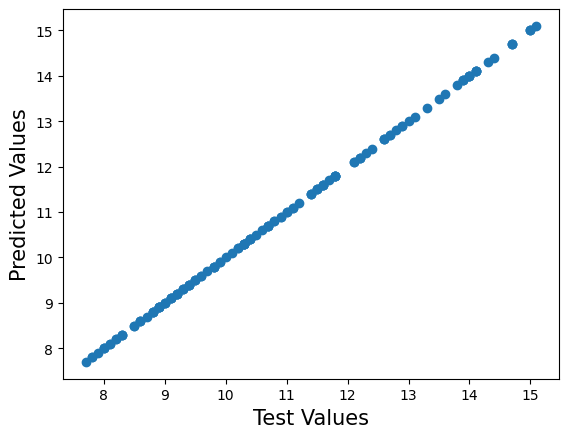

In [45]:
ypred_lr = lr.predict(xtest)
plt.scatter(ytest,ypred_lr)
plt.xlabel("Test Values", size=15)
plt.ylabel("Predicted Values", size=15)
plt.show()

In [46]:
#To check if there is overfitting or under fitting
print("training score = ",lr.score(xtrain,ytrain))
print("testing score = ",lr.score(xtest,ytest))

training score =  1.0
testing score =  1.0


In [47]:
ypred = lr.predict(xtest)

In [48]:
r2_score(ytest, ypred)

1.0

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(ytest, ypred))
print("RMSE:", rmse)

# Calculate the MAE
mae = mean_absolute_error(ytest, ypred)
print("MAE:", mae)

# Calculate the R2 score
r2_score = r2_score(ytest, ypred)
print("R2 Score:", r2_score)

# Calculate the accuracy
accuracy = lr.score(xtest, ytest)
print("Accuracy:", accuracy)


RMSE: 1.8513413036726634e-15
MAE: 1.5435928397547003e-15
R2 Score: 1.0
Accuracy: 1.0


# **Neural Network**

In [50]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(900,), activation='relu', solver='adam', max_iter=1000)
nn.fit(xtrain, ytrain)

MLPRegressor(hidden_layer_sizes=(900,), max_iter=1000)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Accuracy
accuracy_nn = nn.score(xtest, ytest) * 100
print("Accuracy:", accuracy_nn)
# RMSE
rmse_nn = np.sqrt(mean_squared_error(ytest, ypred))
print("RMSE:", rmse_nn)
# MAE
mae_nn = mean_absolute_error(ytest, ypred)
print("MAE:", mae_nn)
# R2
r2_nn = r2_score(ytest, ypred)
print("R2:", r2_nn)


Accuracy: 99.39959865306272
RMSE: 1.8513413036726634e-15
MAE: 1.5435928397547003e-15
R2: 1.0


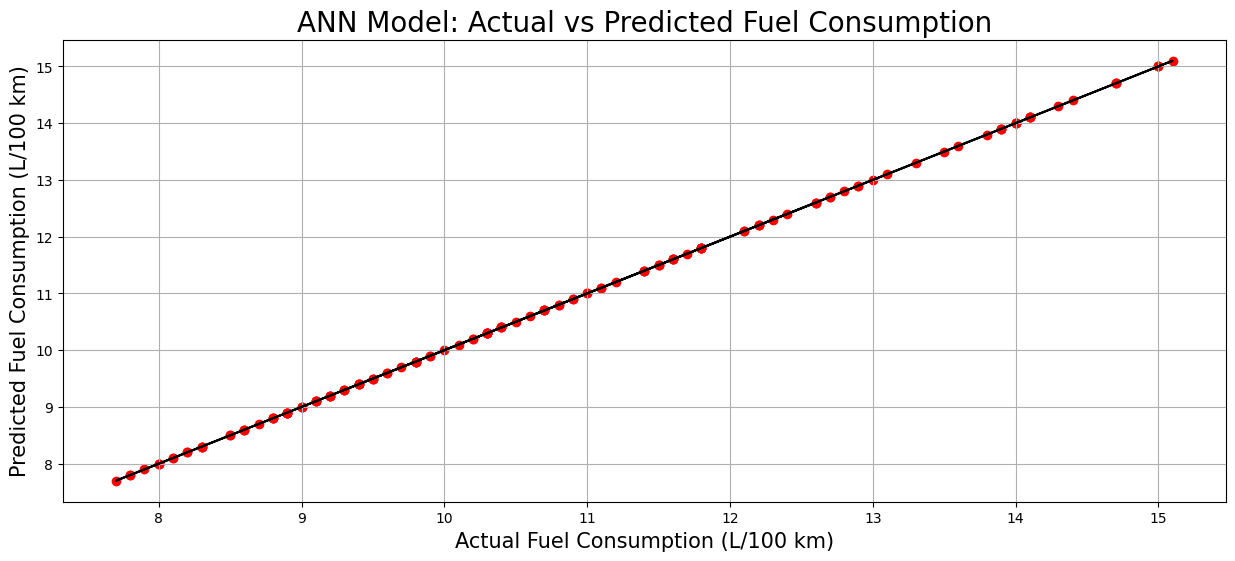

In [52]:
plt.figure(figsize=(15, 6))
plt.scatter(ytest, ypred, color='red')
plt.plot(ytest, ytest, color='black')
plt.title('ANN Model: Actual vs Predicted Fuel Consumption', fontsize=20)
plt.xlabel('Actual Fuel Consumption (L/100 km)', fontsize=15)
plt.ylabel('Predicted Fuel Consumption (L/100 km)', fontsize=15)
plt.grid(True)
plt.show()

In [53]:
y_pred = nn.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print('MSE:', mse)

MSE: 0.02426292520421011


# **SVM**

In [54]:
from sklearn.svm import SVR

# Assuming you've defined your SVM regressor with appropriate parameters
svm_regressor = SVR(kernel='rbf')
# Fit the SVR model to your training data
svm_regressor.fit(xtrain, ytrain)
# Predict on the test set
y_pred = svm_regressor.predict(xtest)

# Evaluate the model
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Calculate accuracy (you may want to use a different metric for regression tasks)
accuracy = svm_regressor.score(xtest, ytest)
print("Accuracy:", accuracy*100)

Mean Squared Error: 0.028949171032108784
Accuracy: 99.28363455213638


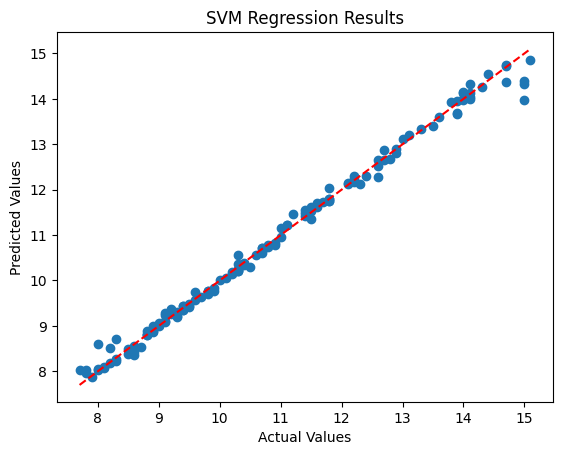

In [55]:
import matplotlib.pyplot as plt

# Get the actual and predicted values
actual_values = ytest
predicted_values = y_pred


# Create a scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.scatter(actual_values, predicted_values)

# Add a diagonal line to represent perfect predictions
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'r--')

# Set labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVM Regression Results')

# Show the plot
plt.show()


In [56]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print("RMSE:", rmse)

# Calculate the MAE
mae = mean_absolute_error(ytest, y_pred)
print("MAE:", mae)


# Calculate the accuracy (you may want to use a different metric for regression tasks)
accuracy = svm_regressor.score(xtest, ytest)
print("Accuracy:", accuracy*100)



RMSE: 0.17014455921982571
MAE: 0.10524187705131162
Accuracy: 99.28363455213638


# **Random Forest**

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [58]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [59]:
random_grid = {
    'n_estimators': no_of_decision_tree,
    'max_features': max_no_of_features,
    'max_depth': max_depth,
    'criterion': criterion_of_decision_tree,
    'min_samples_split': min_sample_split
}

In [60]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 25 , cv = 5 ,n_jobs=-1)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [61]:
rscv.best_params_

{'n_estimators': 70,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 15,
 'criterion': 'poisson'}

In [62]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

**Checking if model is overfitted or underfitted**

In [63]:
rf = RandomForestRegressor(random_state=42)
rf.fit(xtrain, ytrain)

ypred = rf.predict(xtest)

# Evaluate the model
print("Training score = ", rf.score(xtrain, ytrain))
print("Testing score = ", rf.score(xtest, ytest))

Training score =  0.9999824270941459
Testing score =  0.9998653530592189


In [64]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(ytest, ypred))
print("RMSE:", rmse)

# Calculate the MAE
mae = mean_absolute_error(ytest, ypred)
print("MAE:", mae)
from sklearn.metrics import r2_score

# Calculate the R2 score
r2_score = r2_score(ytest, ypred)
print("R2 Score:", r2_score)

# Calculate the accuracy
accuracy = rf.score(xtest, ytest)
print("Accuracy:", accuracy)


RMSE: 0.023326468612522317
MAE: 0.010813793103451637
R2 Score: 0.9998653530592189
Accuracy: 0.9998653530592189


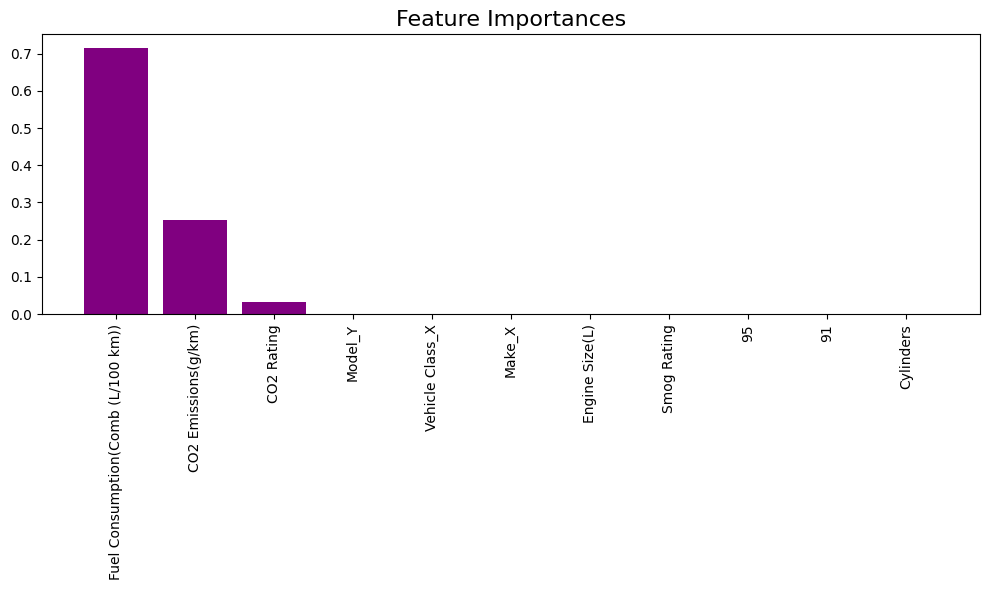

In [65]:
importances = rf.feature_importances_
features = x.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances', fontsize=16)
plt.bar(range(x.shape[1]), importances[indices], color='purple', align='center')
plt.xticks(range(x.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier with 100 trees
rfc = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the classifier
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


# **KNN**

---



In [67]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3)

knn_regressor.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=3)

In [68]:
y_pred = knn_regressor.predict(xtest)

In [69]:
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

accuracy = knn_regressor.score(xtest, ytest)
print("R^2 Score:", accuracy)

Mean Squared Error: 0.12236781609195396
R^2 Score: 0.9697193141449272


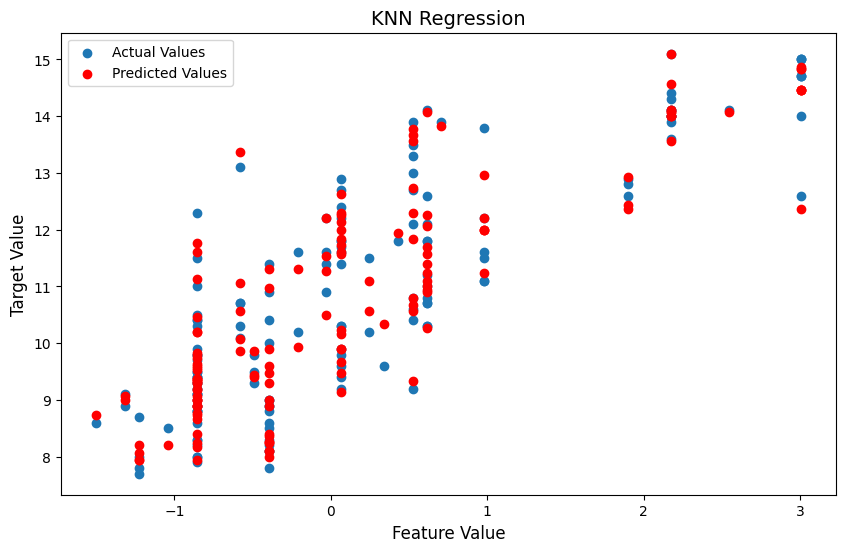

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.scatter(xtest[:, 0], ytest, label="Actual Values")
ax.scatter(xtest[:, 0], y_pred, color='red', label="Predicted Values")


ax.set_xlabel("Feature Value", fontsize=12)
ax.set_ylabel("Target Value", fontsize=12)
ax.set_title("KNN Regression", fontsize=14)

ax.legend()

plt.show()


In [71]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print("RMSE:", rmse)

# Calculate the MAE
mae = mean_absolute_error(ytest, y_pred)
print("MAE:", mae)

from sklearn.metrics import r2_score

# Calculate the R2 score
r2_score = r2_score(ytest, ypred)
print("R2 Score:", r2_score)

# Calculate the accuracy
accuracy = knn_regressor.score(xtest, ytest)
print("Accuracy:", accuracy)


RMSE: 0.3498111148776636
MAE: 0.25770114942528743
R2 Score: 0.9998653530592189
Accuracy: 0.9697193141449272


# **AdaBoost**

---



In [72]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

base_estimator = DecisionTreeRegressor(max_depth=4)

ada_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

ada_regressor.fit(xtrain, ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  random_state=42)

In [73]:
y_pred = ada_regressor.predict(xtest)

In [74]:
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Square Error:", rmse)


accuracy = ada_regressor.score(xtest, ytest)
print("R^2 Score:", accuracy*100)

print("training score = ",ada_regressor.score(xtrain,ytrain))

Root Mean Square Error: 0.0377194013811472
R^2 Score: 99.96479307606988
training score =  0.9996615319816969


In [75]:
base_estimator = DecisionTreeRegressor(max_depth=4)

# Initialize arrays to store the errors
train_errors = []
test_errors = []

# Range of n_estimators to try
n_estimators_range = range(1, 101)

for n_estimators in n_estimators_range:
    # Create the AdaBoost regressor
    ada_regressor = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=1.0, random_state=42)

    # Fit the AdaBoost regressor to the training data
    ada_regressor.fit(xtrain, ytrain)

    # Predict on the training set and calculate the mean squared error
    y_train_pred = ada_regressor.predict(xtrain)
    train_mse = mean_squared_error(ytrain, y_train_pred)
    train_errors.append(train_mse)

    # Predict on the test set and calculate the mean squared error
    y_test_pred = ada_regressor.predict(xtest)
    test_mse = mean_squared_error(ytest, y_test_pred)
    test_errors.append(test_mse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

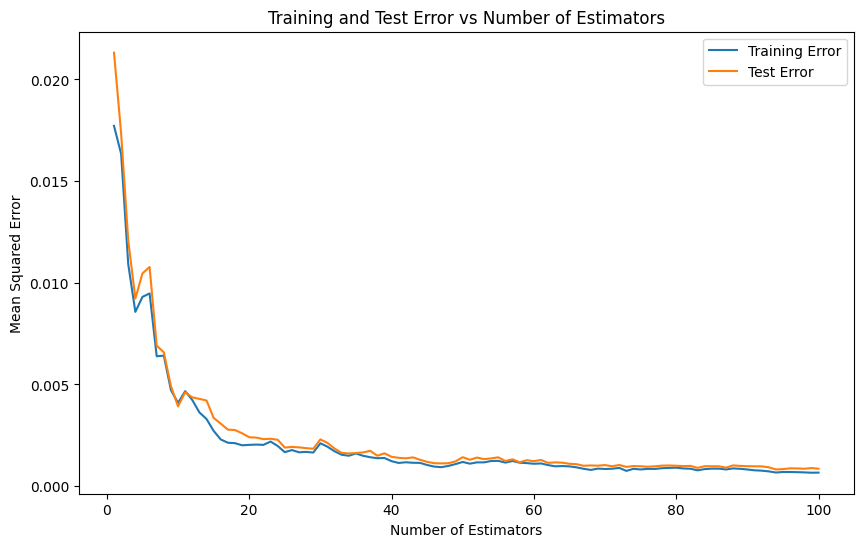

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label='Training Error')
plt.plot(n_estimators_range, test_errors, label='Test Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error vs Number of Estimators')
plt.legend()
plt.show()

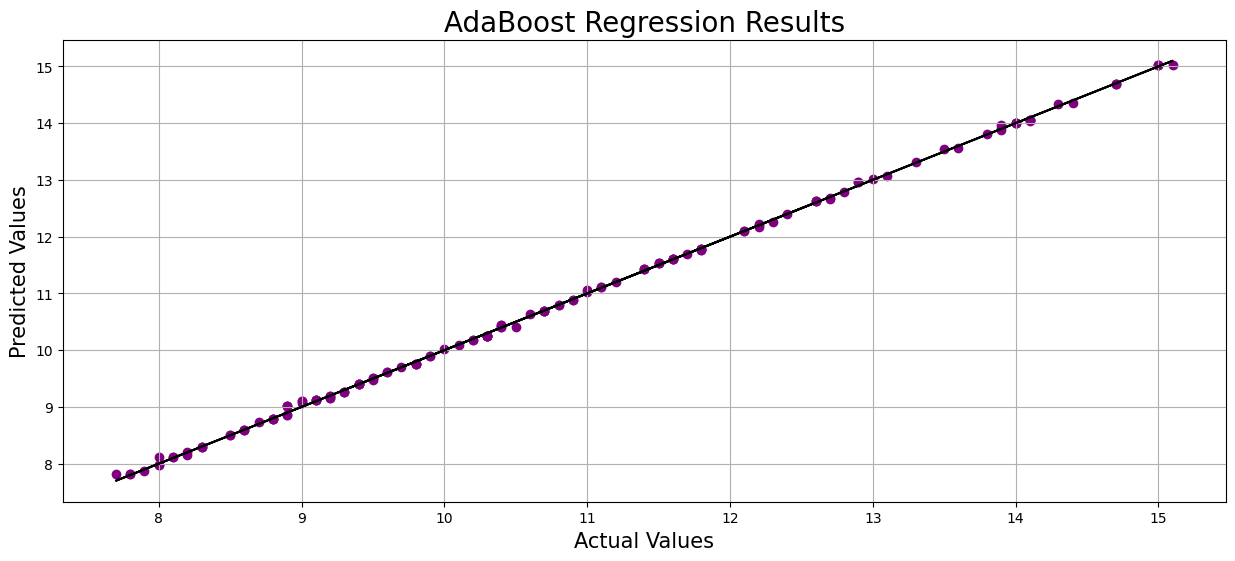

In [77]:
plt.figure(figsize=(15, 6))
plt.scatter(ytest, y_pred, color='purple')
plt.plot(ytest, ytest, color='black')
plt.title('AdaBoost Regression Results', fontsize=20)
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.grid(True)
plt.show()

# **Grid Search**

---



In [78]:
#Linear Regression
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming df, xtest, and ytest are predefined
fuel = df
X = xtest
y = ytest

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Define parameter grid
param_grid = {
    'lr__fit_intercept': [True, False],
    'lr__n_jobs': [None, -1]  # Use all processors or leave as default
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=6)
grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best model
best_model = grid_search.best_estimator_

Fitting 6 folds for each of 4 candidates, totalling 24 fits
[CV] END ............lr__fit_intercept=True, lr__n_jobs=None; total time=   0.0s
[CV] END ............lr__fit_intercept=True, lr__n_jobs=None; total time=   0.0s
[CV] END ............lr__fit_intercept=True, lr__n_jobs=None; total time=   0.0s
[CV] END ............lr__fit_intercept=True, lr__n_jobs=None; total time=   0.0s
[CV] END ............lr__fit_intercept=True, lr__n_jobs=None; total time=   0.0s
[CV] END ............lr__fit_intercept=True, lr__n_jobs=None; total time=   0.0s
[CV] END ..............lr__fit_intercept=True, lr__n_jobs=-1; total time=   0.0s
[CV] END ..............lr__fit_intercept=True, lr__n_jobs=-1; total time=   0.0s
[CV] END ..............lr__fit_intercept=True, lr__n_jobs=-1; total time=   0.0s
[CV] END ..............lr__fit_intercept=True, lr__n_jobs=-1; total time=   0.0s
[CV] END ..............lr__fit_intercept=True, lr__n_jobs=-1; total time=   0.0s
[CV] END ..............lr__fit_intercept=True, lr

In [79]:
#KNN
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming df, xtest, and ytest are predefined
fuel = df
X = xtest
y = ytest

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

# Define parameter grid
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=6)
grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best model
best_model = grid_search.best_estimator_

Fitting 6 folds for each of 64 candidates, totalling 384 fits
[CV] END knn__algorithm=auto, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=3, knn__p=1, knn__weights=uniform; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.0s
[CV] END knn__algorithm=auto, knn__n_neighbors=3, knn__p=1, knn__weights=distance; total time=   0.0s
[CV] END knn__algorithm=au

In [80]:
#ANN
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming df, xtest, and ytest are predefined
fuel = df
X = xtest
y = ytest

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(max_iter=10))
])

# Define parameter grid
param_grid = {
    'mlp__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.05],
    'mlp__learning_rate': ['constant','adaptive']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=6)
grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best model
best_model = grid_search.best_estimator_

Fitting 6 folds for each of 48 candidates, totalling 288 fits
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__s

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), ml

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__le

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=tanh, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_size

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(5

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, m

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.0001, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 50, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(50, 100, 50), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.1s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; to

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=constant, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=sgd; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; total time=   0.0s
[CV] END mlp__activation=relu, mlp__alpha=0.05, mlp__hidden_layer_sizes=(100,), mlp__learning_rate=adaptive, mlp__solver=adam; 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

In [ ]:
#RF
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming df, xtest, and ytest are predefined
fuel = df
X = xtest
y = ytest

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])

# Define parameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=6)
grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best model

In [ ]:
#SVM
import numpy as np
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load dataset
X =xtest
y = ytest

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define parameter grid
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': [1, 0.1, 0.01, 0.001],
    'svr__kernel': ['rbf', 'linear']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best model
best_model = grid_search.best_estimator_

In [ ]:
#ADA
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Assuming df, xtest, and ytest are predefined
fuel = df
X = xtest
y = ytest

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ada', AdaBoostRegressor())
])

# Define parameter grid
param_grid = {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 1.0],
    'ada__loss': ['linear', 'square', 'exponential']
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=6)
grid_search.fit(X, y)

# Print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Use the best model
best_model = grid_search.best_estimator_